In [97]:
import pandas as pd
file_path = "/content/insurance.csv"
dataset = pd.read_csv(file_path)
print(dataset.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [98]:
print("dataset shape:")
print(dataset.shape)

dataset shape:
(1338, 7)


In [99]:
print("columns:")
dataset.columns

columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [100]:

string_columns = ['sex', 'smoker', 'region']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Store the encoder for potential reverse transformation

print(dataset.head())
print("dataset shape:")
print(dataset.shape)
print("columns:")
dataset.columns

   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86
dataset shape:
(1338, 7)
columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [101]:
print("NUll Values:")
print(dataset.isnull().sum())


NUll Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [103]:
print(dataset.describe())


               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.665471     1.094918     0.204783   
std      14.049960     0.500160     6.098382     1.205493     0.403694   
min      18.000000     0.000000    16.000000     0.000000     0.000000   
25%      27.000000     0.000000    26.300000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.100000     5.000000     1.000000   

            region      expenses  
count  1338.000000   1338.000000  
mean      1.515695  13270.422414  
std       1.104885  12110.011240  
min       0.000000   1121.870000  
25%       1.000000   4740.287500  
50%       2.000000   9382.030000  
75%       2.000000  16639.915000  
max       3.000000  63770.430000  


In [104]:
vector_example = dataset['smoker']

print('vector_example\n',vector_example)

factor_example = dataset['smoker'].astype('category')

print('\n\nfactor_example\n',factor_example)

list_example = [vector_example, factor_example, dataset['smoker']]

print('\n\nlist_example\n',list_example)

matrix_example = dataset[['age', 'smoker']].to_numpy()

print('\n\nmatrix_example\n',matrix_example)

data_frame_example = pd.DataFrame({
    'Age': dataset['age'],
    'BMI': dataset['bmi'],
    'Smoker': dataset['smoker']
})

print("Data structures created:")
print(list_example)

vector_example
 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64


factor_example
 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: category
Categories (2, int64): [0, 1]


list_example
 [0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64, 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: category
Categories (2, int64): [0, 1], 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64]


matrix_example
 [[19  1]
 [18  0]
 [28  0]
 ...
 [18  0]
 [21  0]
 [61  1]]
Data structures created:
[0       1
1       0
2

In [105]:
max_smoker = 100000
max_age = 100
dataset = dataset[(dataset['smoker'] <= max_smoker) & (dataset['age'] <= max_age)]

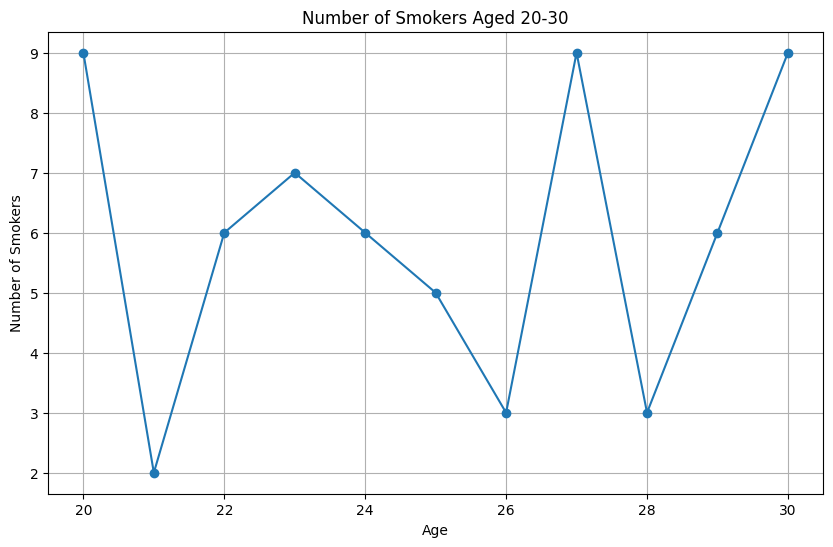

In [106]:
smokers_20_30 = dataset[(dataset['age'] >= 20) & (dataset['age'] <= 30) & (dataset['smoker'] == 1)]
smoker_counts = smokers_20_30.groupby('age')['smoker'].count()
plt.figure(figsize=(10, 6))
plt.plot(smoker_counts.index, smoker_counts.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.title('Number of Smokers Aged 20-30')
plt.grid(True)
plt.show()

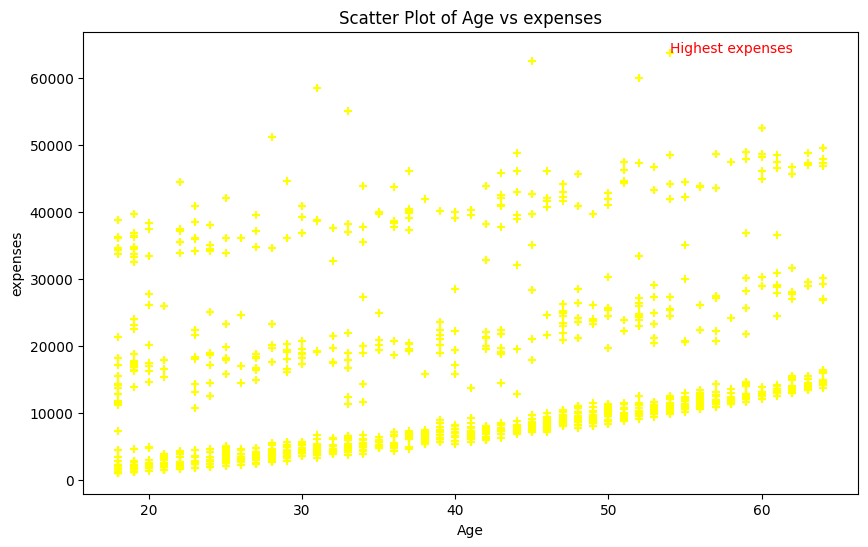

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(dataset['age'], dataset['expenses'], c='yellow', marker='+')
plt.title('Scatter Plot of Age vs expenses')
plt.xlabel('Age')
plt.ylabel('expenses')

if not dataset.empty:
    highest_expenses = dataset.loc[dataset['expenses'].idxmax()]
    plt.text(highest_expenses['age'], highest_expenses['expenses'], 'Highest expenses', color='red')

plt.show()


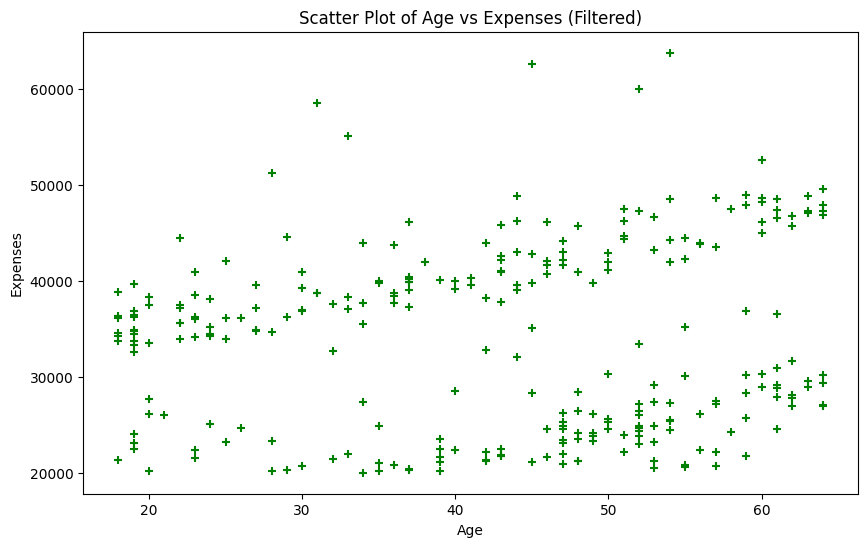

In [108]:
filtered_data = dataset[dataset['expenses'] > 20000]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='green', marker='+')
plt.title('Scatter Plot of Age vs Expenses (Filtered)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()

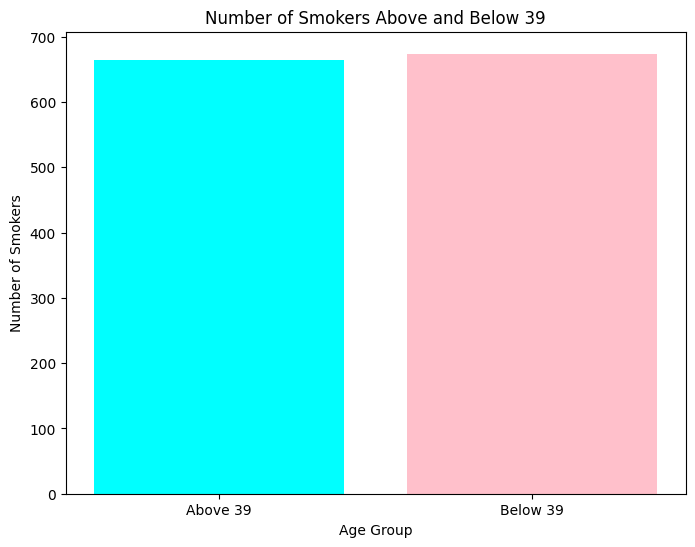

In [109]:
a = dataset[dataset['age'] > 39]['smoker'].value_counts()
b = dataset[dataset['age'] <= 39]['smoker'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(['Above 39', 'Below 39'], [a.sum(), b.sum()], color=['cyan', 'pink'])

plt.xlabel("Age Group")
plt.ylabel("Number of Smokers")
plt.title("Number of Smokers Above and Below 39")

plt.show()

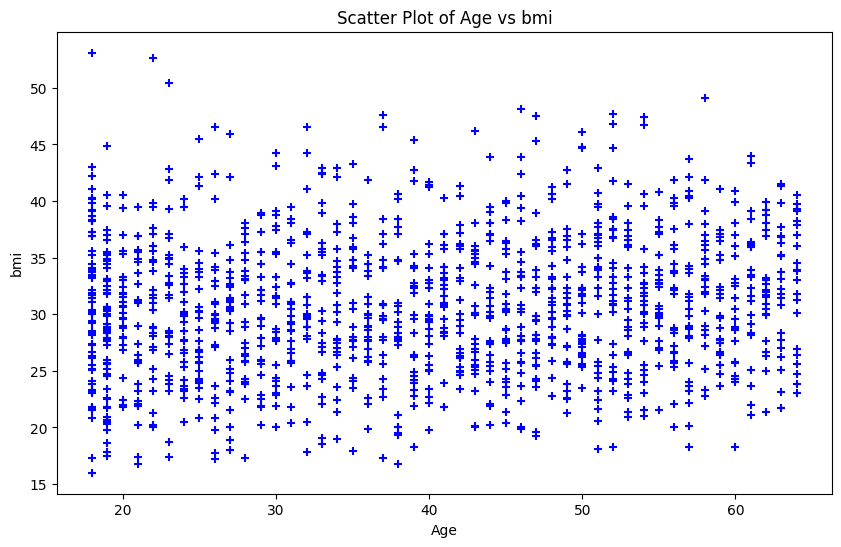

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['age'], dataset['bmi'], c='blue', marker='+')
plt.title('Scatter Plot of Age vs bmi')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()